In [1]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd
import time
from tqdm.notebook import tqdm
from selenium.webdriver.common.keys import Keys
from bs4 import BeautifulSoup as bs
import requests as req
from selenium.webdriver.common.action_chains import ActionChains

In [2]:
driver = webdriver.Chrome(ChromeDriverManager().install())

In [3]:
driver.get('https://www.amazon.com/Republic-Soothing-Moisture-Percent-Cosmetics/dp/B00DTFJA54/ref=sr_1_1?keywords=nature+republic&qid=1663293164&sr=8-1')
driver.maximize_window()

In [4]:
actions = ActionChains(driver)

reviews = driver.find_element_by_xpath('//*[@id="acrCustomerReviewText"]')
actions.move_to_element(reviews)
actions.click(reviews)
actions.perform()

In [5]:
all_reviews = driver.find_element_by_xpath('//*[@id="cr-pagination-footer-0"]/a')
actions.move_to_element(all_reviews)
actions.click(all_reviews)
actions.perform()

In [6]:
sort_by = driver.find_element_by_css_selector('#a-autoid-3-announce')
sort_by.click()
time.sleep(2)

recent= driver.find_element_by_css_selector('#sort-order-dropdown_1')
recent.click()
time.sleep(2)

In [7]:
review_list = []
star_list = []
n=0

while n <= 10:
    n = n+1
    page = driver.find_element_by_xpath('//*[@id="cm_cr-pagination_bar"]/ul/li[2]/a')
    page.click()
    time.sleep(2)
    soup = bs(driver.page_source, 'html.parser')
    review = soup.select('div.a-row.a-spacing-small.review-data')
    star = soup.select('div:nth-child(2) > a:nth-child(1) > i > span')
    for i in review:
        string= i.text
        string = string.replace('\n', '')
        review_list.append(string)
    for i in star:
        string = i.text
        string = string.replace('out', '')
        string = string.replace('of', '')
        string = string.replace('5 stars', '')
        string = string.replace(' ', '')
        star_list.append(string) 

In [8]:
print(review_list)

['Straight aloe, cool feeling after a hard day of being outside! Not the alcohol scent the others have.', 'It very light weighted, it alone isn’t enough to moisturize my face. May have to add serum and other products for it not to feel dry on my face after a few minutes. No strong scent, the scent goes away quickly too. I prefer to use this as a facial on the rest of my face while I’m doing a nose peel then afterwards either rinse it off or layer something more moisturizing on top.', 'I used this product with hopes to clear and smooth my skin. I woke up with itchy patches all over where I applied the product. Definitely had a bad reaction.', 'works fine for me', 'It should not include scent', 'Use this in the morning on top of my moisturizer and it is not sticky nor shiny. It hydrates my skin for the rest of the day. I also use before putting foundation on and it is awesome!', 'Simply aloe. No funky odor. I apply it to my face daily. I live in Colorado so the air is very dry. My skin w

In [9]:
print(star_list)

['5.0', '3.0', '3.0', '5.0', '3.0', '5.0', '5.0', '5.0', '1.0', '5.0', '3.0', '1.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '3.0', '5.0', '1.0', '5.0', '5.0', '5.0', '5.0', '5.0', '1.0', '5.0', '5.0', '5.0', '5.0', '4.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '1.0', '1.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '2.0', '5.0', '5.0', '5.0', '3.0', '5.0', '5.0', '5.0', '5.0', '1.0', '5.0', '5.0', '5.0', '2.0', '5.0', '5.0', '4.0', '5.0', '4.0', '5.0', '5.0', '5.0', '5.0', '5.0', '2.0', '2.0', '5.0', '5.0', '5.0', '5.0', '5.0', '5.0', '4.0', '4.0', '5.0', '5.0', '5.0', '5.0', '3.0', '5.0', '5.0']


In [10]:
len(review_list),len(star_list)

(110, 110)

In [49]:
data = {'리뷰' : review_list, '별점' :star_list}

df = pd.DataFrame(data)
df

,리뷰,별점
0,"Straight aloe, cool feeling after a hard day o...",5.0
1,"It very light weighted, it alone isn’t enough ...",3.0
2,I used this product with hopes to clear and sm...,3.0
3,works fine for me,5.0
4,It should not include scent,3.0
...,...,...
105,NICE PRODUCT,5.0
106,Quality Was really very great and effective,5.0
107,"Cooling gel, the scent i believe is too strong...",3.0
108,Use it as facial mask with V-E and cream toget...,5.0


In [42]:
!pip install nltk

In [54]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np

In [ ]:
nltk.download('punkt')

In [51]:
stopwords = nltk.corpus.stopwords.words('english')

In [52]:
def Amazon_tags(string):
    word_list = []
    
    string = string.lower()
    string = nltk.word_tokenize(string)    
    string = nltk.pos_tag(string)
 
    for word, tag in string:
        if tag in['NN', 'NNS', 'NNP','NNPS','JJ','JJR','JJS','VB','VBD','VBG','VBP','VBZ']:
            if word not in stopwords:
                word_list.append(word)
            
    return word_list

In [56]:
text = ''.join(review_list)
text

'Straight aloe, cool feeling after a hard day of being outside! Not the alcohol scent the others have.It very light weighted, it alone isn’t enough to moisturize my face. May have to add serum and other products for it not to feel dry on my face after a few minutes. No strong scent, the scent goes away quickly too. I prefer to use this as a facial on the rest of my face while I’m doing a nose peel then afterwards either rinse it off or layer something more moisturizing on top.I used this product with hopes to clear and smooth my skin. I woke up with itchy patches all over where I applied the product. Definitely had a bad reaction.works fine for meIt should not include scentUse this in the morning on top of my moisturizer and it is not sticky nor shiny. It hydrates my skin for the rest of the day. I also use before putting foundation on and it is awesome!Simply aloe. No funky odor. I apply it to my face daily. I live in Colorado so the air is very dry. My skin was so dry and flakey. Thi

In [57]:
final = Amazon_tags(text)
count = Counter(final)

<function matplotlib.pyplot.show(close=None, block=None)>

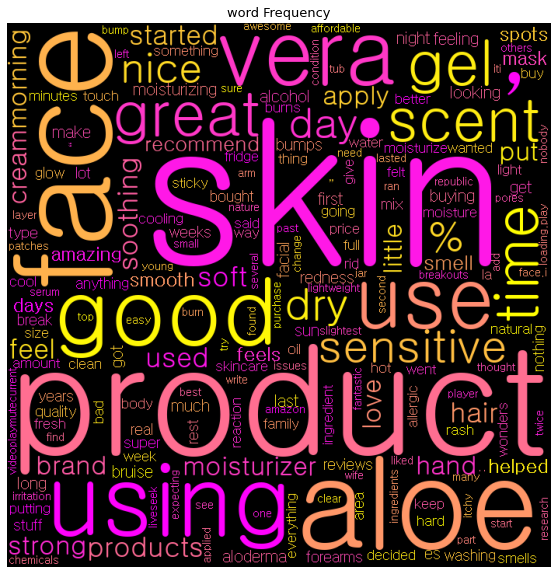

In [59]:
wordcloud = WordCloud(font_path='C:\Windows\Fonts\gulim.ttc',
                    width = 700,
                    height= 700,
                    background_color='black',
                    colormap ='spring',
                    random_state=1).generate_from_frequencies(count)

plt.figure(figsize=(10,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.title("word Frequency", size = 13)
plt.show